In [ ]:
import torch
from torch import nn

#torch vision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor


# Import matplotlib

import matplotlib.pyplot as plt



In [ ]:
#setup traning data
train_data = datasets.FashionMNIST(
    root="data",#where to dwonload
    train=True,
    download=True,
    transform=torchvision.transforms.ToTensor(),
    target_transform=None
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

100%|██████████| 26421880/26421880 [00:00<00:00, 120138107.18it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 5469904.67it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 61283111.49it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 7758633.49it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [ ]:
len(train_data), len(test_data)

(60000, 10000)

In [ ]:
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [ ]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [ ]:
print(f"image Shape: {image.shape}")
print(f"Label {class_names[label]}")

image Shape: torch.Size([1, 28, 28])
Label Ankle boot


Image shape: torch.Size([1, 28, 28])


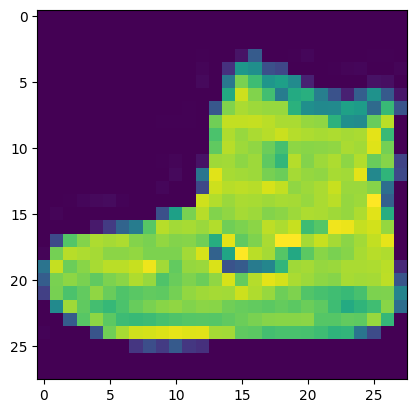

In [ ]:
image, label = train_data[0]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze())


(-0.5, 27.5, 27.5, -0.5)

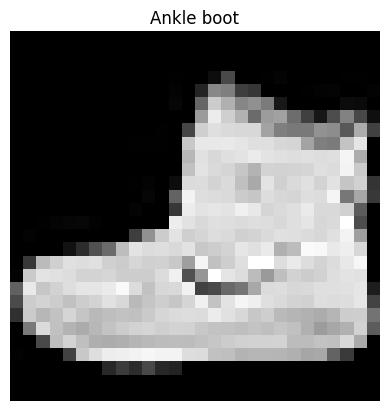

In [ ]:
plt.imshow(image.squeeze(), cmap='gray')
plt.title(class_names[label]);
plt.axis(False)

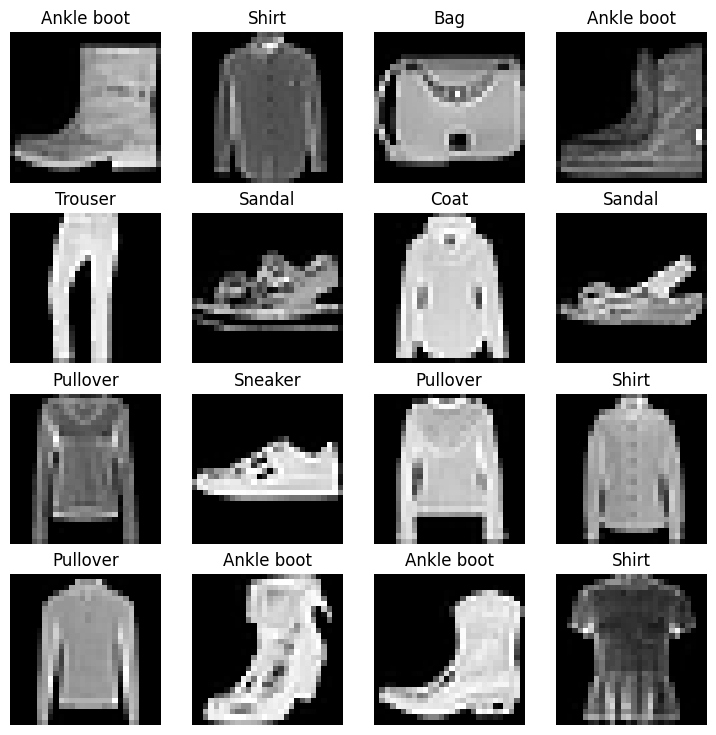

In [ ]:
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows*cols+1):
  random_idx = torch.randint(0, len(train_data), size=[1]).item()
  img, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(class_names[label])
  plt.axis(False);

In [ ]:
#Prepare Data Loader
from torch.utils.data import DataLoader

BATCH_SIZE = 32

#Turn datasets into itrable
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)
test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)
train_dataloader,test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7c0cb511c730>,
 <torch.utils.data.dataloader.DataLoader at 0x7c0cb511fe80>)

In [ ]:
# Cheak what we created
print(f"DataLoaders: {train_dataloader, test_dataloader}")
print(f"Lennght of train dataloader: { len(train_dataloader)}")
print(f"Lenght of test dataloader: {len(test_dataloader)}")

DataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x7c0cb511c730>, <torch.utils.data.dataloader.DataLoader object at 0x7c0cb511fe80>)
Lennght of train dataloader: 1875
Lenght of test dataloader: 313


In [ ]:
train_features_batch , train_labels_batch = next(iter(train_dataloader))

Image size: torch.Size([1, 28, 28])
label: 8, label size: torch.Size([])


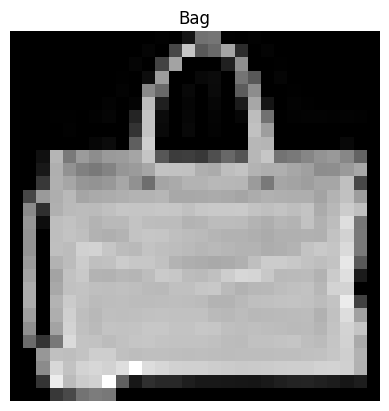

In [ ]:
#torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)
print(f"Image size: {img.shape}")
print(f"label: {label}, label size: {label.shape}")

In [ ]:
# 3 Model0

flatten_model = nn.Flatten()

x = train_features_batch[0]



output = flatten_model(x)

print(f"Shape before flatten: {x.shape}")
print(f"shape after flatting: {output.shape}")

Shape before flatten: torch.Size([1, 28, 28])
shape after flatting: torch.Size([1, 784])


In [ ]:
from torch import nn
class FashionMNISTV0(nn.Module):
  def __init__(self, input_shape: int,
               hidden_units: int,
               output_shape:int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units),
        nn.Linear(in_features=hidden_units,
                  out_features=output_shape)
    )

  def forward(self, x):
    return self.layer_stack(x)



In [ ]:
torch.manual_seed(42)

model_0 = FashionMNISTV0(
    input_shape=28*28,
    hidden_units=10,
    output_shape=len(class_names)
).to('cuda')
model_0

FashionMNISTV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [ ]:
dummy_x = torch.rand([1, 1, 28, 28])

device = "cuda" if torch.cuda.is_available() else "cpu"
9

9

In [ ]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]],
                     device='cuda:0')),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163], device='cuda:0')),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0

In [ ]:
import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
  print(f"helper_function.py already exist, skiping download...")
else:
  print("Downloading...")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

Downloading...


In [ ]:
# Import accurac metric
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

In [ ]:
from timeit import default_timer as timer
def print_train_time(start:float,
                     end: float,
                     device: torch.device = None):

  total_time = end - start
  print(f"Train time on {device}: {total_time:.3f} secounds")
  return total_time

In [ ]:
start_time = timer()
end_time = timer()

print_train_time(start=start_time, end=end_time, device="cuda")

Train time on cuda: 0.000 secounds


6.538100001307612e-05

In [ ]:
from tqdm.auto import tqdm

torch.manual_seed(42)
train_time_start_on_cpu = timer()


epochs = 3

for epoch in tqdm(range(epochs)):
  print(f"Epochs: {epoch}\n----------")
  ###Training
  train_loss = 0
  # Add a loop to loop throgh thr traning batches
  for batch, (X, y) in enumerate(train_dataloader):
    X, y = X.to(device), y.to(device)
    model_0.train()
    y_pred = model_0(X)

    loss = loss_fn(y_pred, y)
    train_loss += loss

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    if batch %400 == 0:
      print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)}sapmles.")
  train_loss /= len(train_dataloader)


  test_loss, test_acc = 0, 0
  model_0.eval()
  with torch.inference_mode():
    for X_test, y_test in test_dataloader:
      X_test, y_test = X_test.to(device), y_test.to(device)
      test_pred = model_0(X_test)

      test_loss += loss_fn(test_pred, y_test)

      test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))

    test_loss /= len(test_dataloader)

    test_acc /= len(test_dataloader)

  print(f"\nTrain_loss: {train_loss:.4f} | Test_loss:{test_loss:.4f}, Testacc: {test_acc:.2f}")

train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                            end=train_time_end_on_cpu,
                                            device=str(next(model_0.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epochs: 0
----------
Looked at 0/60000sapmles.
Looked at 12800/60000sapmles.
Looked at 25600/60000sapmles.
Looked at 38400/60000sapmles.
Looked at 51200/60000sapmles.

Train_loss: 0.5904 | Test_loss:0.5095, Testacc: 82.04
Epochs: 1
----------
Looked at 0/60000sapmles.
Looked at 12800/60000sapmles.
Looked at 25600/60000sapmles.
Looked at 38400/60000sapmles.
Looked at 51200/60000sapmles.

Train_loss: 0.4763 | Test_loss:0.4799, Testacc: 83.20
Epochs: 2
----------
Looked at 0/60000sapmles.
Looked at 12800/60000sapmles.
Looked at 25600/60000sapmles.
Looked at 38400/60000sapmles.
Looked at 51200/60000sapmles.

Train_loss: 0.4550 | Test_loss:0.4766, Testacc: 83.43
Train time on cuda:0: 30.755 secounds


In [ ]:
str(next(model_0.parameters()).device)

'cuda:0'

In [ ]:
## Make predictions
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device: torch.device= device):
  loss, acc= 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in tqdm(data_loader):
      X, y = X.to(device), y.to(device)
      y_pred = model(X)

      #Accumalate loss and acc pre batch
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true=y,
                        y_pred=y_pred.argmax(dim=1))

      #Scale the loss and acc find avg loss/acc pre batch
      loss /= len(data_loader)
      acc /= len(data_loader)

  return {"model_name": model.__class__.__name__,
          "model_loss": loss.item(),
          "model_acc": acc}
# calculate model 0 result on test datasets

model_2_result = eval_model = eval_model(model=model_2,
                                         data_loader=test_dataloader,
                                         loss_fn=loss_fn,
                                         accuracy_fn=accuracy_fn,
                                         device=device)

model_2_result

  0%|          | 0/313 [00:00<?, ?it/s]

RuntimeError: ignored

In [ ]:
!nvidia-smi

Fri Jan  5 11:33:55 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P0              27W /  70W |    159MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
torch.cuda.is_available()

True

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [ ]:
# Bulding non-linear model
class FashionMNISTModelV1(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
       nn.Flatten (),
       nn.Linear(in_features=input_shape,
                 out_features=hidden_units),
       nn.ReLU(),
       nn.Linear(in_features=input_shape,
                 out_features=output_shape),
       nn.ReLU()
    )
  def forward(self, x:torch.Tensor):
    return self.layer_stack(x)



In [ ]:
next(model_0.parameters()).device

device(type='cuda', index=0)

In [ ]:
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape=784,
                             hidden_units=10,
                             output_shape=len(class_names)).to(device)
str(next(model_1.parameters()).device)

'cuda:0'

In [ ]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_1.parameters(),
                             lr=0.1)


In [ ]:
  test_loss, test_acc = 0, 0
  model_0.eval()
  with torch.inference_mode():
    for X_test, y_test in test_dataloader:
      X_test, y_test = X_test.to(device), y_test.to(device)
      test_pred = model_0(X_test)

      test_loss += loss_fn(test_pred, y_test)

      test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))

    test_loss /= len(test_dataloader)

    test_acc /= len(test_dataloader)

In [ ]:
# Functianizing traning and evaluation loop

def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
  train_loss, train_acc = 0, 0
  #Put model into traning mode
  model.train()

  # Add a loop to loop throgh thr traning batches
  for batch, (X, y) in enumerate(data_loader):
    #Put data to target device
    X, y = X.to(device), y.to(device)
    # Forward Pass
    y_pred = model(X)

    loss = loss_fn(y_pred, y)
    train_loss += loss
    train_acc += accuracy_fn(y_true=y,
                             y_pred=y_pred.argmax(dim=1))

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()


  train_loss /= len(data_loader)
  train_acc /= len(data_loader)
  print(f"Train Loss: {train_loss: .5f} | Train_acc: {train_acc:.5f}")



In [ ]:
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device= device):
  test_loss, test_acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in dataloader:
      X, y = X.to(device), y.to(device)

      test_pred = model(X)

      test_loss += loss_fn(test_pred, y)

      test_acc += accuracy_fn(y_true=y,
                              y_pred=test_pred.argmax(dim=1))

    test_loss /= len(dataloader)
    test_acc /= len(dataloader)
    print(f"Test Loss: {test_loss:.5f} | Test Acc: {test_acc:.5f}")

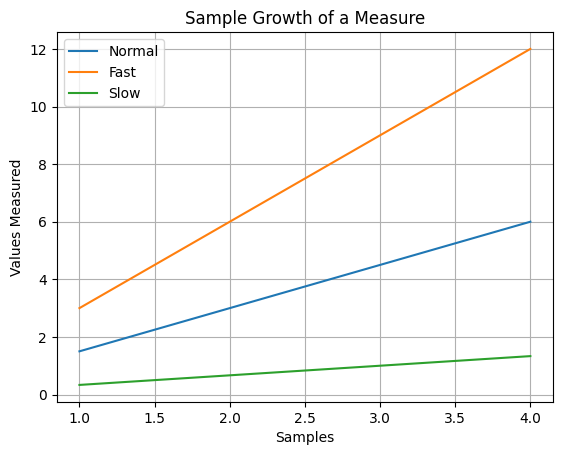

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
x = np.arange(1, 5)
plt.plot(x, x*1.5, label='Normal')
#[<matplotlib.lines.Line2D object at 0x2ab5f50>]
plt.plot(x, x*3.0, label='Fast')
#[<matplotlib.lines.Line2D object at 0x2ac5210>]
plt.plot(x, x/3.0, label='Slow')
##[<matplotlib.lines.Line2D object at 0x2ac5650>]
plt.grid(True)
plt.title('Sample Growth of a Measure')
#<matplotlib.text.Text object at 0x2aa8890>
plt.xlabel('Samples')
#<matplotlib.text.Text object at 0x2aa6150>
plt.ylabel('Values Measured')
#<matplotlib.text.Text object at 0x2aa6d10>
plt.legend(loc='upper left')
#<matplotlib.legend.Legend object at 0x2ac5c50>
plt.show()

In [ ]:
torch.manual_seed(42)

from timeit import default_timer as timer
train_time_start_on_gpu = timer()

epochs = 3

for epoch in tqdm(range(epochs)):
  print(f"Epoch {epoch}\n---------")
  train_step(model=model_1,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
              accuracy_fn=accuracy_fn,
             device=device)

  test_step(model=model_1,
            dataloader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)
train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_end_on_gpu,
                                            end=train_time_end_on_gpu,
                                            device=device)


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch 0
---------
Train Loss:  0.43026 | Train_acc: 84.94167
Test Loss: 0.47664 | Test Acc: 83.42652
Epoch 1
---------
Train Loss:  0.43026 | Train_acc: 84.94167
Test Loss: 0.47664 | Test Acc: 83.42652
Epoch 2
---------
Train Loss:  0.43026 | Train_acc: 84.94167
Test Loss: 0.47664 | Test Acc: 83.42652
Train time on cuda: 0.000 secounds


In [ ]:
model_0_result


{'model_name': 'FashionMNISTV0',
 'model_loss': 0.0010611432371661067,
 'model_acc': 0.30028917735831345}

In [ ]:
# Get model_1 result dictionary

model_1_results = test_step(model=model_1,
                             dataloader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn,
                             device=device)
model_1_results

Test Loss: 0.47664 | Test Acc: 83.42652


In [ ]:
model_0_result

{'model_name': 'FashionMNISTV0',
 'model_loss': 0.0010611432371661067,
 'model_acc': 0.30028917735831345}

In [ ]:
# Model2 CNN'S
class FashionMNISTModelV2(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7,
                  out_features=output_shape)
    )
  def forward(self, x):
    x = self.conv_block_1(x)
    print(x.shape)
    x = self.conv_block_2(x)
    print(x.shape)
    x = self.classifier(x)
    return x

In [ ]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1,
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)

In [ ]:
model_2.state_dict()

OrderedDict([('conv_block_1.0.weight',
              tensor([[[[ 0.2548,  0.2767, -0.0781],
                        [ 0.3062, -0.0730,  0.0673],
                        [-0.1623,  0.1958,  0.2938]]],
              
              
                      [[[-0.2445,  0.2897,  0.0624],
                        [ 0.2463,  0.0451,  0.1607],
                        [-0.0471,  0.2570,  0.0493]]],
              
              
                      [[[-0.1556,  0.0850, -0.1536],
                        [-0.0391, -0.1354,  0.2211],
                        [-0.2631, -0.1537, -0.0941]]],
              
              
                      [[[-0.2004,  0.0315, -0.3292],
                        [ 0.3010, -0.2832,  0.2573],
                        [ 0.0555, -0.1082,  0.2060]]],
              
              
                      [[[ 0.0520,  0.2693,  0.0364],
                        [-0.1051,  0.0896, -0.0904],
                        [ 0.1403,  0.2976,  0.1927]]],
              
              
      

In [ ]:
torch.manual_seed(42)

images = torch.randn(size=(32, 3, 64, 64))
test_image = images[0]

print(f"Image batch shape: {images.shape}")
print(f"Single image Shape: {test_image.shape}")
print(f"Test image:\n {test_image}")

Image batch shape: torch.Size([32, 3, 64, 64])
Single image Shape: torch.Size([3, 64, 64])
Test image:
 tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0

In [ ]:
# Single conv2d layer
torch.manual_seed(42)
cov_layer = nn.Conv2d(in_channels=3,
                     out_channels=10,
                     kernel_size=(3, 3),
                     stride=1,
                     padding=1)

conv_output = cov_layer(test_image)
conv_output.shape

torch.Size([10, 64, 64])

In [ ]:
print(f"Test iamge original shape: {test_image.shape}")
print(f"Test image with unsqueezed dimansions: {test_image.unsqueeze(0).shape}")

#Create smaple nn.maxpool2d layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)
test_image_throgh_conv = cov_layer(test_image.unsqueeze(dim=0))
print(f"Shape after going conv_layer(): {test_image_throgh_conv.shape}")


# Pass data throgh the max pool layer
test_image_throgh_conv_and_max_pool = max_pool_layer(test_image_throgh_conv)
print(f"Shape after going throgh conv_layer() and max_pool_layer(): {test_image_throgh_conv_and_max_pool.shape}")


Test iamge original shape: torch.Size([3, 64, 64])
Test image with unsqueezed dimansions: torch.Size([1, 3, 64, 64])
Shape after going conv_layer(): torch.Size([1, 10, 64, 64])
Shape after going throgh conv_layer() and max_pool_layer(): torch.Size([1, 10, 32, 32])


In [ ]:
torch.manual_seed(42)

#Create a random tensor with a similar number of dims to our images
random_tensor = torch.randn(size=(1, 1, 2, 2))
print(f"\nMax Pool tensor\n {random_tensor}")
print(f"Max pool tensor shape: {random_tensor.shape}")

# Create max pool layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)
#Pass The random tensor
max_pool_tensor = max_pool_layer(random_tensor)
print(f"\nMax Pool tensor\n {max_pool_tensor}")
print(f"Max pool tensor shape: {max_pool_tensor.shape}")



Max Pool tensor
 tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])
Max pool tensor shape: torch.Size([1, 1, 2, 2])

Max Pool tensor
 tensor([[[[0.3367]]]])
Max pool tensor shape: torch.Size([1, 1, 1, 1])


In [ ]:
image.shape

torch.Size([1, 28, 28])

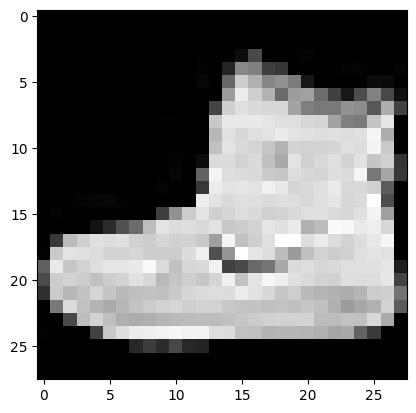

In [ ]:
plt.imshow(image.squeeze(), cmap="gray");

In [ ]:
rand_image_tensor = torch.randn(size=(1, 28, 28))
rand_image_tensor.shape

torch.Size([1, 28, 28])

In [ ]:
model_2(rand_image_tensor.unsqueeze(0).to(device))

torch.Size([1, 10, 14, 14])
torch.Size([1, 10, 7, 7])


tensor([[ 0.0424, -0.0839,  0.0839, -0.0463,  0.0053,  0.0437,  0.0025,  0.0108,
         -0.0158, -0.0177]], device='cuda:0', grad_fn=<AddmmBackward0>)

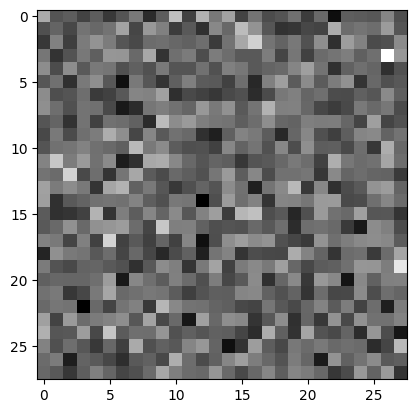

In [ ]:
plt.imshow(rand_image_tensor.squeeze(), cmap="gray");

In [ ]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV1(input_shape=784,
                             hidden_units=10,
                             output_shape=len(class_names)).to(device)
str(next(model_2.parameters()).device)

'cuda:0'

In [ ]:
# Setup loss Functiom
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_2.parameters(),
                             lr=0.1)

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)


# Measure Time
from timeit import default_timer as timer
train_time_start_model_2 = timer()

epochs = 3
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n---------")
  train_step(model=model_2,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)
  test_step(model=model_2,
            dataloader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)
  train_time_end_model_2 = timer()
  total_train_time_model_2 = print_train_time(start=train_time_start_model_2,
                                              end=train_time_end_model_2,
                                              device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Train Loss:  0.43026 | Train_acc: 84.94167
Test Loss: 0.47664 | Test Acc: 83.42652
Train time on cuda: 9.085 secounds
Epoch: 1
---------
Train Loss:  0.43026 | Train_acc: 84.94167
Test Loss: 0.47664 | Test Acc: 83.42652
Train time on cuda: 18.901 secounds
Epoch: 2
---------
Train Loss:  0.43026 | Train_acc: 84.94167
Test Loss: 0.47664 | Test Acc: 83.42652
Train time on cuda: 28.713 secounds


In [ ]:
model_2.parameters()

<generator object Module.parameters at 0x7c0ca850ce40>

In [ ]:
model_1_result = eval_model(model=model_1,
                            data_loader=test_dataloader,
                            loss_fn=loss_fn,
                            accuracy_fn=accuracy_fn,
                            device=device)
model_1_result

TypeError: 'dict' object is not callable

In [ ]:
model_2_result = eval_model = eval_model(model=model_2,
                            data_loader=test_dataloader,
                            loss_fn=loss_fn,
                            accuracy_fn=accuracy_fn,
                            device=device)
model_2_result

TypeError: 'dict' object is not callable

In [ ]:
import pandas as pd
compare_result = pd.DataFrame([model_0_result,
                               model_2_result])
compare_result

In [ ]:
# Visualize
compare_result.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("accuracy (%)")
plt.ylabel("model");

In [ ]:
def make_predictions(model: torch.nn.Module,
                     data: list,
                     device: torch.device = device):
  pred_probs = []
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
      sample = torch.unsqueeze(sample, dim=0).to(device)


      pred_logit = model(sample)

      pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

      # Get pred prob off gpu for matplotlib
      pred_probs.append(pred_prob.cpu())

  return torch.stack(pred_probs)




In [ ]:
import random
random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
  test_samples.append(sample)
  test_labels.append(label)


test_samples[0].shape

In [ ]:
plt.imshow(test_samples[0].squeeze(), cmap="gray")

In [ ]:
pred_probs = make_predictions(model=model_2,
                              data=test_samples)
pred_probs[:2]

In [ ]:
#convert prediction s to labels
pred_classes = pred_probs.argmax(dim=1)
pred_classes

In [ ]:
test_labels

In [ ]:
plt.figure(figsize=(9, 9))
rows = 3
ncols = 3
for i, samples in enumerate(test_samples):
  plt.subplot(rows, ncols, i+1)

  plt.imshow(sample.squeeze(), cmap="gray")

  pred_label = class_names[pred_classes[i]]

  #Get true albel
  truth_label = class_names[test_labels[i]]

  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  if pred_label == truth_label:
    plt.title(title_text, fontsize=100, c="g")
  else:
    plt.title(title_text, fontsize=10, c="r")

  plt.axis(False);

In [ ]:
# Making confusin matrix
from tqdm.auto import tqdm
y_preds = []
model_2.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="making Predictions..."):
    X, y = X.to(device), y.to(device)
    y_logit = model_2(X)
    y_pred = torch.softmax(y_logit.squeeze(), dim=0).argmax(dim=1)
    # Put predictions on CPU For matplotlib
    y_preds.append(y_pred.cpu())

#print(y_preds)
y_pred_tensor = torch.cat(y_preds)
y_pred_tensor[:10]

In [ ]:
mlxtend.__version__

In [ ]:
try:
  import torchmetrics, mlxtend
  print(f"mlxtend: {mlxtend.__version__}")
  assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend version should be 0.019.0 or higher"
except:
  !pip install torchmetrics -U mlxtend
  import torchmetrics , mlxtend
  print(f"mlxtend version: {mlxtend.__version __}")